In [13]:
import pandas as pd

# Define the file paths
input_file = 'c:/Users/Elvis/Kaggle Project/NEW-DATA-1.T15.txt'

# Read the text file


# Maunally define the column names
column_names = [
    'Date', 'Time', 'Temperature_Comedor_Sensor', 'Temperature_Habitacion_Sensor', 'Weather_Temperature',
    'CO2_Comedor_Sensor', 'CO2_Habitacion_Sensor', 'Humedad_Comedor_Sensor', 'Humedad_Habitacion_Sensor',
    'Lighting_Comedor_Sensor', 'Lighting_Habitacion_Sensor', 'Precipitacion', 'Meteo_Exterior_Crepusculo',
    'Meteo_Exterior_Viento', 'Meteo_Exterior_Sol_Oest', 'Meteo_Exterior_Sol_Est', 'Meteo_Exterior_Sol_Sud',
    'Meteo_Exterior_Piranometro', 'Exterior_Entalpic_1', 'Exterior_Entalpic_2', 'Exterior_Entalpic_turbo',
    'Temperature_Exterior_Sensor', 'Humedad_Exterior_Sensor', 'Day_Of_Week'
]

# Assuming the text file is space-separated and has a header row
df = pd.read_csv(input_file, delim_whitespace=True, comment='#', names=column_names, skiprows=1)

# Display the DataFrame to verify it was read correctly
print("DataFrame:")
print(df.head())




DataFrame:
         Date   Time  Temperature_Comedor_Sensor  \
0  13/03/2012  11:45                     18.1875   
1  13/03/2012  12:00                     18.4633   
2  13/03/2012  12:15                     18.7673   
3  13/03/2012  12:30                     19.0727   
4  13/03/2012  12:45                     19.3721   

   Temperature_Habitacion_Sensor  Weather_Temperature  CO2_Comedor_Sensor  \
0                        17.8275                  0.0             216.560   
1                        18.1207                  6.8             219.947   
2                        18.4367                 17.0             219.403   
3                        18.7513                 18.0             218.613   
4                        19.0414                 20.0             217.714   

   CO2_Habitacion_Sensor  Humedad_Comedor_Sensor  Humedad_Habitacion_Sensor  \
0                221.920                 39.9125                    42.4150   
1                220.363                 39.9267       

C:\Users\Elvis\AppData\Local\Temp\ipykernel_31864\1270885208.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(input_file, delim_whitespace=True, comment='#', names=column_names, skiprows=1)


In [14]:
# Check the data types of the columns
print("\nData types:")
print(df.dtypes)


Data types:
Date                              object
Time                              object
Temperature_Comedor_Sensor       float64
Temperature_Habitacion_Sensor    float64
Weather_Temperature              float64
CO2_Comedor_Sensor               float64
CO2_Habitacion_Sensor            float64
Humedad_Comedor_Sensor           float64
Humedad_Habitacion_Sensor        float64
Lighting_Comedor_Sensor          float64
Lighting_Habitacion_Sensor       float64
Precipitacion                    float64
Meteo_Exterior_Crepusculo        float64
Meteo_Exterior_Viento            float64
Meteo_Exterior_Sol_Oest          float64
Meteo_Exterior_Sol_Est           float64
Meteo_Exterior_Sol_Sud           float64
Meteo_Exterior_Piranometro       float64
Exterior_Entalpic_1                int64
Exterior_Entalpic_2                int64
Exterior_Entalpic_turbo            int64
Temperature_Exterior_Sensor      float64
Humedad_Exterior_Sensor          float64
Day_Of_Week                      float64
dty

In [15]:
# Checking for missing values
df.isnull().sum()

Date                             0
Time                             0
Temperature_Comedor_Sensor       0
Temperature_Habitacion_Sensor    0
Weather_Temperature              0
CO2_Comedor_Sensor               0
CO2_Habitacion_Sensor            0
Humedad_Comedor_Sensor           0
Humedad_Habitacion_Sensor        0
Lighting_Comedor_Sensor          0
Lighting_Habitacion_Sensor       0
Precipitacion                    0
Meteo_Exterior_Crepusculo        0
Meteo_Exterior_Viento            0
Meteo_Exterior_Sol_Oest          0
Meteo_Exterior_Sol_Est           0
Meteo_Exterior_Sol_Sud           0
Meteo_Exterior_Piranometro       0
Exterior_Entalpic_1              0
Exterior_Entalpic_2              0
Exterior_Entalpic_turbo          0
Temperature_Exterior_Sensor      0
Humedad_Exterior_Sensor          0
Day_Of_Week                      0
dtype: int64

In [16]:
df['Day_Of_Week']

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
2759    3.0
2760    3.0
2761    3.0
2762    3.0
2763    3.0
Name: Day_Of_Week, Length: 2764, dtype: float64

<Axes: xlabel='Precipitacion'>

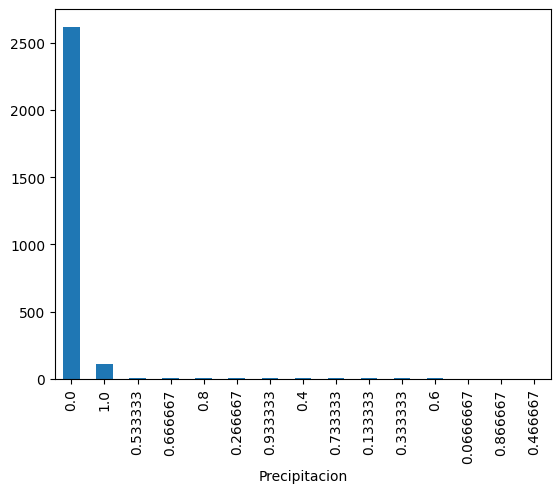

In [17]:
import seaborn as sns
df['Precipitacion'].value_counts().plot(kind='bar')

<Axes: xlabel='Precipitacion_Category'>

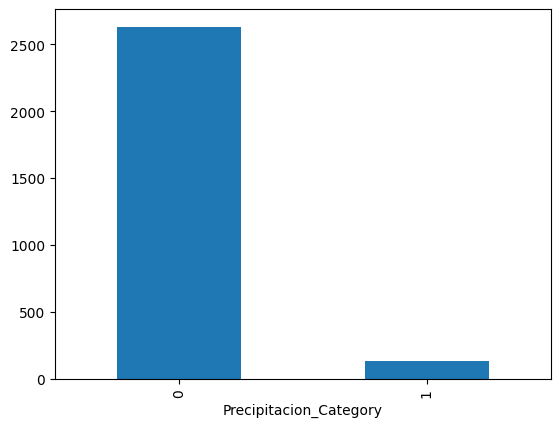

In [18]:
# Create a category of the preicipation if the probability is greater than 0.5
df['Precipitacion_Category'] = df['Precipitacion'].apply(lambda x: 1 if x > 0.5 else 0)
df['Precipitacion_Category'].value_counts().plot(kind='bar')

<Axes: xlabel='Precipitacion_Category'>

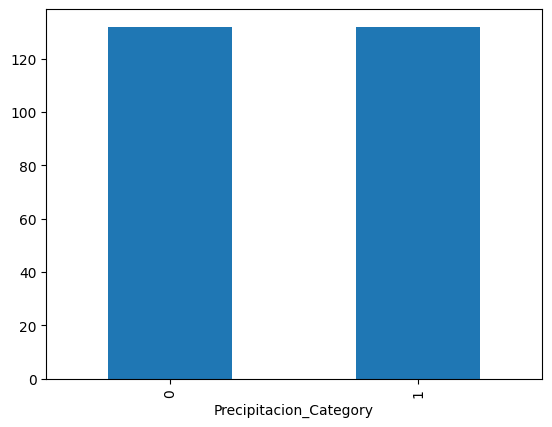

In [19]:
# Since the data is time series, we can use the date as the index
# and the dataset is imbalanced, we can undersample the Majority data where the precipitation is 0
from sklearn.utils import resample
df_majority = df[df['Precipitacion_Category'] == 0]
df_minority = df[df['Precipitacion_Category'] == 1]
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority),     
                                   random_state=123) # reproducible results
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled['Precipitacion_Category'].value_counts().plot(kind='bar')

In [26]:
df_downsampled['DateTime'] = pd.to_datetime(df_downsampled['Date'] + ' ' + df_downsampled['Time'], format='%d/%m/%Y %H:%M')

# Extract date and time components
df_downsampled['Year'] = df_downsampled['DateTime'].dt.year
df_downsampled['Month'] = df_downsampled['DateTime'].dt.month
df_downsampled['Day'] = df_downsampled['DateTime'].dt.day
df_downsampled['Hour'] = df_downsampled['DateTime'].dt.hour
df_downsampled['Minute'] = df_downsampled['DateTime'].dt.minute
df_downsampled['Second'] = df_downsampled['DateTime'].dt.second
df_downsampled['DayOfWeek'] = df_downsampled['DateTime'].dt.dayofweek

# Drop the original 'DateTime' column
df_downsampled.drop(columns=['DateTime'], inplace=True)
df_downsampled.drop(columns=['Date','Time'],axis=1, inplace=True)




<Axes: xlabel='DayOfWeek'>

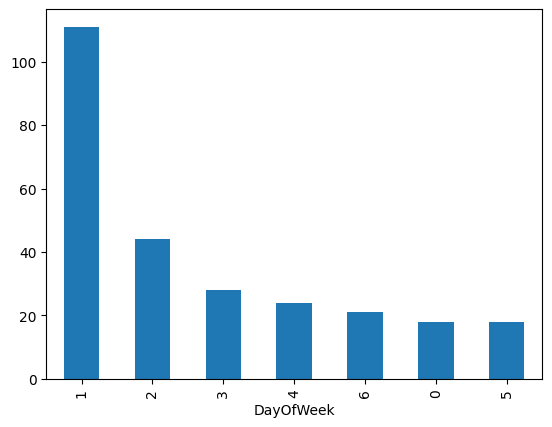

In [24]:
df_downsampled['DayOfWeek'].value_counts().plot(kind='bar')


In [27]:
df_downsampled.dtypes   


Temperature_Comedor_Sensor       float64
Temperature_Habitacion_Sensor    float64
Weather_Temperature              float64
CO2_Comedor_Sensor               float64
CO2_Habitacion_Sensor            float64
Humedad_Comedor_Sensor           float64
Humedad_Habitacion_Sensor        float64
Lighting_Comedor_Sensor          float64
Lighting_Habitacion_Sensor       float64
Precipitacion                    float64
Meteo_Exterior_Crepusculo        float64
Meteo_Exterior_Viento            float64
Meteo_Exterior_Sol_Oest          float64
Meteo_Exterior_Sol_Est           float64
Meteo_Exterior_Sol_Sud           float64
Meteo_Exterior_Piranometro       float64
Exterior_Entalpic_1                int64
Exterior_Entalpic_2                int64
Exterior_Entalpic_turbo            int64
Temperature_Exterior_Sensor      float64
Humedad_Exterior_Sensor          float64
Day_Of_Week                      float64
Precipitacion_Category             int64
Year                               int32
Month           

In [29]:
# Naive baysian model building
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
X = df_downsampled.drop(['Precipitacion_Category', 'Precipitacion'], axis=1)
y = df_downsampled['Precipitacion_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
# Making the confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8867924528301887
[[20  6]
 [ 0 27]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        26
           1       0.82      1.00      0.90        27

    accuracy                           0.89        53
   macro avg       0.91      0.88      0.88        53
weighted avg       0.91      0.89      0.89        53

